In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [79]:
# Load the Dataset
data = pd.read_csv('Titanic.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
# Data Cleaning

# 1. Handle missing values
# Fill missing Age values with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop the 'Cabin' column due to too many missing values
data.drop('Cabin', axis=1, inplace=True)

# Fill missing Embarked values with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [81]:
# 2. Convert categorical variables
# Convert 'Sex' to numerical (0 for male, 1 for female)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Use Label Encoding for 'Embarked'
label_encoder = LabelEncoder()
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,0


In [82]:
# 3. Drop irrelevant features
data.drop(['Name', 'Ticket', 'PassengerId','Parch'], axis=1, inplace=True)

data

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.0,1,7.2500,2
1,1,1,1,38.0,1,71.2833,0
2,1,3,1,26.0,0,7.9250,2
3,1,1,1,35.0,1,53.1000,2
4,0,3,0,35.0,0,8.0500,2
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,13.0000,2
887,1,1,1,19.0,0,30.0000,2
888,0,3,1,28.0,1,23.4500,2
889,1,1,0,26.0,0,30.0000,0


In [83]:
# 4. Feature scaling (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])
data


,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,-0.565736,1,-0.502445,2
1,1,1,1,0.663861,1,0.786845,0
2,1,3,1,-0.258337,0,-0.488854,2
3,1,1,1,0.433312,1,0.420730,2
4,0,3,0,0.433312,0,-0.486337,2
...,...,...,...,...,...,...,...
886,0,2,0,-0.181487,0,-0.386671,2
887,1,1,1,-0.796286,0,-0.044381,2
888,0,3,1,-0.104637,1,-0.176263,2
889,1,1,0,-0.258337,0,-0.044381,0


In [84]:
# 5. Handle outliers (optional)
# Example using IQR for Fare
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

# Final cleaned dataset
data.head()

# Save the cleaned dataset
data.to_csv('titanic_cleaned.csv', index=False)
data

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,-0.565736,1,-0.502445,2
2,1,3,1,-0.258337,0,-0.488854,2
3,1,1,1,0.433312,1,0.420730,2
4,0,3,0,0.433312,0,-0.486337,2
5,0,3,0,-0.104637,0,-0.478116,1
...,...,...,...,...,...,...,...
886,0,2,0,-0.181487,0,-0.386671,2
887,1,1,1,-0.796286,0,-0.044381,2
888,0,3,1,-0.104637,1,-0.176263,2
889,1,1,0,-0.258337,0,-0.044381,0


C:\Users\HP\AppData\Local\Temp\ipykernel_13120\2646953303.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


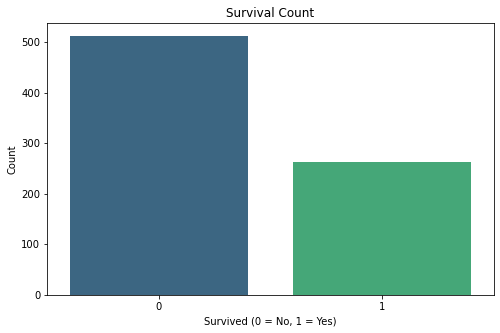


Insight 1: 
- The bar chart reveals that the majority of passengers did not survive (Survived = 0).
- However, a significant number did survive, indicating some patterns in survival characteristics.



In [85]:
# Load the cleaned dataset
data = pd.read_csv('titanic_cleaned.csv')

# 1. Bar Chart for a Categorical Variable (Survived)
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

print('''
Insight 1: 
- The bar chart reveals that the majority of passengers did not survive (Survived = 0).
- However, a significant number did survive, indicating some patterns in survival characteristics.
''')



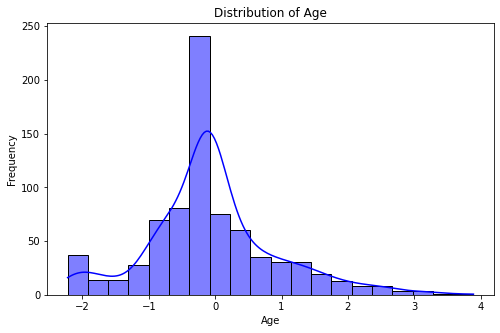


Insight 2:
- The age distribution shows most passengers were in their 20s to 30s.
- The dataset includes fewer children and older adults.



In [86]:
# 2. Histogram for a Numeric Variable (Age)
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print('''
Insight 2:
- The age distribution shows most passengers were in their 20s to 30s.
- The dataset includes fewer children and older adults.
''')



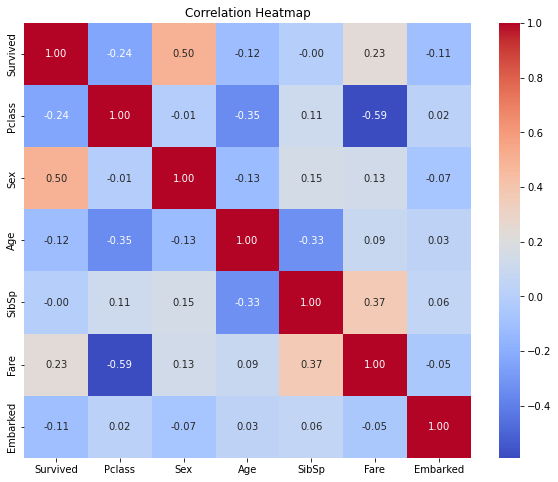


Insight 3:
- The correlation heatmap highlights a positive correlation between Fare and Survival (higher Fare, better survival chances).
- A strong negative correlation exists between Pclass and Survival (lower-class passengers were less likely to survive).


Insight 4:
- Features like Age and Sex also influence survival: 
  - Female passengers (Sex = 1) had higher survival rates compared to males.
  - Age had no strong linear correlation with survival but may interact with other features.



In [87]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

print('''
Insight 3:
- The correlation heatmap highlights a positive correlation between Fare and Survival (higher Fare, better survival chances).
- A strong negative correlation exists between Pclass and Survival (lower-class passengers were less likely to survive).
''')

print('''
Insight 4:
- Features like Age and Sex also influence survival: 
  - Female passengers (Sex = 1) had higher survival rates compared to males.
  - Age had no strong linear correlation with survival but may interact with other features.
''')